In [8]:
import segmentation_models_pytorch as smp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np

from torch.utils.data import DataLoader
from scripts.config import Config
from scripts.utils import CellDataset
%matplotlib inline

config = Config()
sns.set() 

In [2]:
df_train = pd.read_csv(config.TRAIN_CSV)

In [3]:
df_train.head()

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73585 entries, 0 to 73584
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 73585 non-null  object
 1   annotation         73585 non-null  object
 2   width              73585 non-null  int64 
 3   height             73585 non-null  int64 
 4   cell_type          73585 non-null  object
 5   plate_time         73585 non-null  object
 6   sample_date        73585 non-null  object
 7   sample_id          73585 non-null  object
 8   elapsed_timedelta  73585 non-null  object
dtypes: int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
vc = df_train["cell_type"].value_counts()

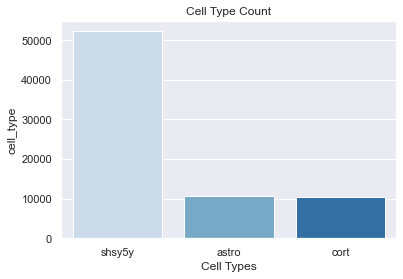

In [6]:
sns.barplot(x=df_train["cell_type"].unique(), y=vc, palette="Blues")
plt.title("Cell Type Count")
plt.xlabel("Cell Types")
plt.show()

In [19]:
ds_train = CellDataset(df_train)

In [9]:
dl_train = DataLoader(
    ds_train, 
    batch_size=64, 
    num_workers=4, 
    pin_memory=True, 
    shuffle=False
)

In [12]:
def _im_convert(tensor, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
    """
    Private function for converting an image so it can be displayed using matplotlib functions properly.
    Parameters
    ----------
    `tensor`\n
        Tensor represention of image data.
    `mean` : `tuple` or `list`, `optional`\n
        Mean of the data; used for de-normalization of the image, by default (0.485, 0.456, 0.406).
    `std` : `tuple` or `list`, `optional`\n
        Standard deviation of the data; used for de-normalaztion of the image, by default (0.229, 0.224, 0.225).
    Returns
    -------
    `ndarray`\n
        Returns ndarry de-normalizazed representation of an image.
    """        
    
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array(std) + np.array(mean) # [0, 1] -> [0, 255]
    image = image.clip(0, 1)
    return image

In [42]:
def display_dataset(ds, dl):
    """
    Displays the dataset. Useful for making sure your data was loaded properly.
    """      
    
    dataiter = iter(dl)
    images, labels = dataiter.next()
    fig = plt.figure(figsize=(25, 8))

    for idx in np.arange(min(64, 20)):
        ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
        plt.imshow(_im_convert(images[idx], mean=config.MEAN, std=config.STD))
        # plt.show()
        # plt.imshow(ds[idx][0], alpha=0.3)
        # plt.show()
        # ax.set_title(train_utils.classes[labels[idx].numpy()])

In [43]:
#ds_train[0][0]

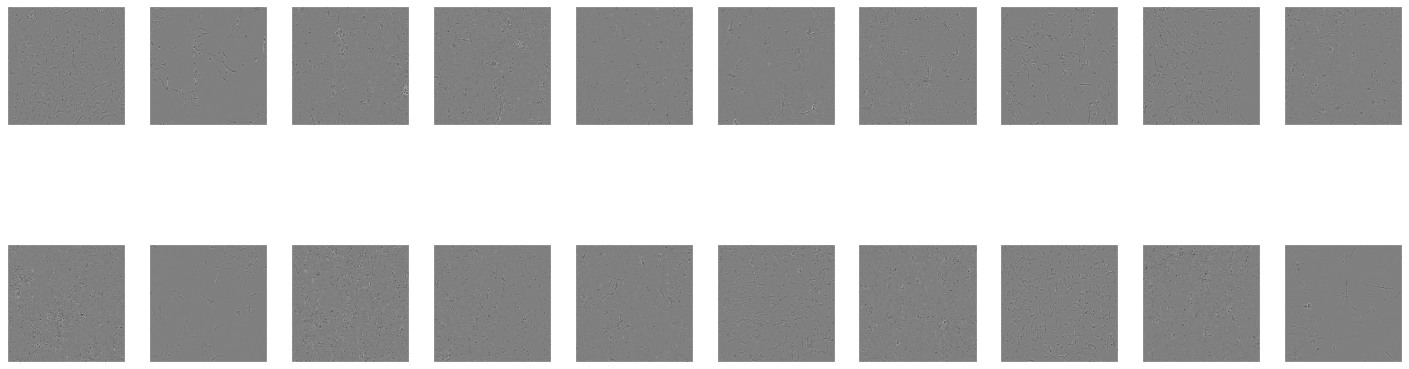

In [44]:
display_dataset(ds=ds_train, dl=dl_train)